In [2]:
import numpy as np
import pandas as pd
import pickle
from sklearn import datasets # sklearn comes with some toy datasets to practise
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from matplotlib import pyplot
from sklearn.metrics import silhouette_score

## Doading Dataset

In [34]:
X = pd.read_csv('data/playlists.csv')

In [35]:
X

,danceability,energy,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo,id,duration_ms
0,0.733,0.812,-4.634,0.0421,0.02240,0.000962,0.1670,0.409,122.985,39C3SOi6UMD9rHeXAQPNa9,154471
1,0.733,0.855,-4.951,0.0528,0.38800,0.000001,0.1410,0.163,111.958,5cBz1eRdiLpTVcKBZkHnul,166092
2,0.698,0.781,-5.615,0.0401,0.14300,0.000000,0.0762,0.851,124.017,2tX3PY8eP3h9XaBcLXuRBa,166573
3,0.863,0.874,-4.798,0.0884,0.00712,0.087800,0.0455,0.811,125.020,6OHQzBYaXeF6FVu8gxLMkE,144025
4,0.727,0.695,-6.190,0.0518,0.00839,0.000000,0.1100,0.811,127.995,164QjgWOxnSZYHQghRKeC0,193382
...,...,...,...,...,...,...,...,...,...,...,...
3354,0.646,0.464,-9.954,0.4090,0.06950,0.887000,0.1400,0.703,197.399,1uy8jY4k6SmI2Zr6fwbldQ,241306
3355,0.946,0.714,-4.598,0.0999,0.00658,0.076100,0.0590,0.823,113.049,7gWTNLC7MX5L9Ii2Ojggto,324078
3356,0.298,0.968,-4.893,0.0539,0.04810,0.869000,0.2790,0.776,173.540,6d2O45piXdSJ1ieRFuYYXn,222533
3357,0.542,0.915,-3.294,0.1910,0.02150,0.828000,0.2000,0.642,136.020,4wIMg49wp66ned9IZ6QUzf,208385


In [36]:
X.describe()

,danceability,energy,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms
count,3359.000000,3359.000000,3359.000000,3359.000000,3359.000000,3359.000000,3359.00000,3359.000000,3359.000000,3.359000e+03
mean,0.546200,0.619606,-8.933328,0.081640,0.288595,0.187495,0.18289,0.497397,120.101746,2.358911e+05
std,0.178633,0.268158,5.774870,0.079894,0.337179,0.332799,0.15066,0.262884,31.203761,1.070480e+05
min,0.000000,0.002120,-43.738000,0.000000,0.000001,0.000000,0.02200,0.000000,0.000000,6.180000e+04
25%,0.431500,0.443000,-10.568500,0.037000,0.008900,0.000000,0.09365,0.289500,95.000000,1.813800e+05
50%,0.552000,0.659000,-7.318000,0.050000,0.122000,0.000353,0.12100,0.496000,117.808000,2.152810e+05
75%,0.671000,0.852000,-5.103000,0.089950,0.516000,0.164000,0.22700,0.712500,141.117500,2.587340e+05
max,0.975000,0.998000,-1.320000,0.962000,0.996000,0.980000,0.98000,0.985000,206.534000,1.904453e+06


In [37]:
# Extract numerical cols
X_num = X.select_dtypes(include=['float64', 'int64'])

In [38]:
X_num

,danceability,energy,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms
0,0.733,0.812,-4.634,0.0421,0.02240,0.000962,0.1670,0.409,122.985,154471
1,0.733,0.855,-4.951,0.0528,0.38800,0.000001,0.1410,0.163,111.958,166092
2,0.698,0.781,-5.615,0.0401,0.14300,0.000000,0.0762,0.851,124.017,166573
3,0.863,0.874,-4.798,0.0884,0.00712,0.087800,0.0455,0.811,125.020,144025
4,0.727,0.695,-6.190,0.0518,0.00839,0.000000,0.1100,0.811,127.995,193382
...,...,...,...,...,...,...,...,...,...,...
3354,0.646,0.464,-9.954,0.4090,0.06950,0.887000,0.1400,0.703,197.399,241306
3355,0.946,0.714,-4.598,0.0999,0.00658,0.076100,0.0590,0.823,113.049,324078
3356,0.298,0.968,-4.893,0.0539,0.04810,0.869000,0.2790,0.776,173.540,222533
3357,0.542,0.915,-3.294,0.1910,0.02150,0.828000,0.2000,0.642,136.020,208385


## Scaling features

In [41]:
scaler = StandardScaler()
scaler.fit(X_num)
X_scaled = scaler.transform(X_num)
X_scaled_df = pd.DataFrame(X_scaled, columns = X_num.columns)
display(X_num.head())
print()
display(X_scaled_df.head())

,danceability,energy,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms
0,0.733,0.812,-4.634,0.0421,0.02240,0.000962,0.1670,0.409,122.985,154471
1,0.733,0.855,-4.951,0.0528,0.38800,0.000001,0.1410,0.163,111.958,166092
2,0.698,0.781,-5.615,0.0401,0.14300,0.000000,0.0762,0.851,124.017,166573
3,0.863,0.874,-4.798,0.0884,0.00712,0.087800,0.0455,0.811,125.020,144025
4,0.727,0.695,-6.190,0.0518,0.00839,0.000000,0.1100,0.811,127.995,193382


,danceability,energy,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms
0,1.045875,0.717572,0.744600,-0.494980,-0.789595,-0.560579,-0.105488,-0.336307,0.092415,-0.760708
1,1.045875,0.877949,0.689699,-0.361033,0.294857,-0.563467,-0.278088,-1.272220,-0.261025,-0.652133
2,0.849913,0.601951,0.574701,-0.520017,-0.431868,-0.563470,-0.708261,1.345291,0.125492,-0.647639
3,1.773731,0.948813,0.716197,0.084623,-0.834919,-0.299609,-0.912062,1.193110,0.157641,-0.858305
4,1.012281,0.281197,0.475117,-0.373551,-0.831152,-0.563470,-0.483881,1.193110,0.252996,-0.397162


## Choosing Number of Clusters

Training a K-Means model with 2 clusters! 

Training a K-Means model with 3 clusters! 

Training a K-Means model with 4 clusters! 

Training a K-Means model with 5 clusters! 

Training a K-Means model with 6 clusters! 

Training a K-Means model with 7 clusters! 

Training a K-Means model with 8 clusters! 

Training a K-Means model with 9 clusters! 

Training a K-Means model with 10 clusters! 

Training a K-Means model with 11 clusters! 

Training a K-Means model with 12 clusters! 

Training a K-Means model with 13 clusters! 

Training a K-Means model with 14 clusters! 

Training a K-Means model with 15 clusters! 

Training a K-Means model with 16 clusters! 

Training a K-Means model with 17 clusters! 

Training a K-Means model with 18 clusters! 

Training a K-Means model with 19 clusters! 

Training a K-Means model with 20 clusters! 



Text(0.5, 1.0, 'Elbow Method showing the optimal k')

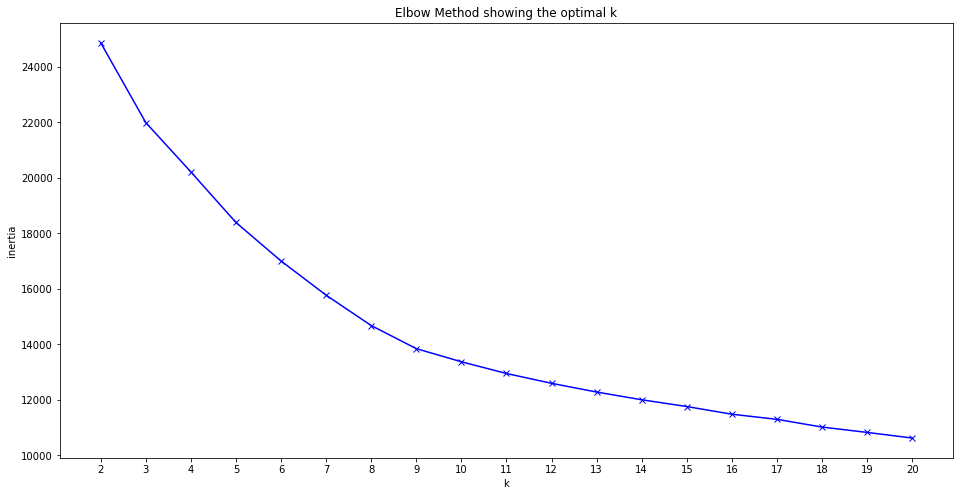

In [43]:
K = range(2, 21)
inertia = []

for k in K:
    print("Training a K-Means model with {} clusters! ".format(k))
    print()
    kmeans = KMeans(n_clusters=k,
                    random_state=1234)
    kmeans.fit(X_scaled_df)
    inertia.append(kmeans.inertia_)

import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

plt.figure(figsize=(16,8))
plt.plot(K, inertia, 'bx-')
plt.xlabel('k')
plt.ylabel('inertia')
plt.xticks(np.arange(min(K), max(K)+1, 1.0))
plt.title('Elbow Method showing the optimal k')

Text(0.5, 1.0, 'Silhouette Method showing the optimal k')

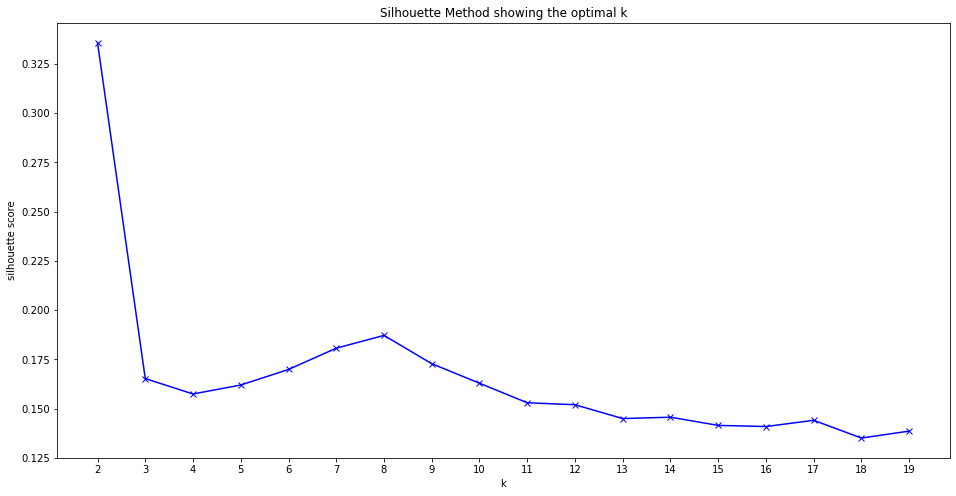

In [44]:
K = range(2, 20)
silhouette = []

for k in K:
    kmeans = KMeans(n_clusters=k,
                    random_state=1234)
    kmeans.fit(X_scaled_df)
    
    filename = "model/kmeans_" + str(k) + ".pickle"
    with open(filename, "wb") as f:
        pickle.dump(kmeans,f)
    
    silhouette.append(silhouette_score(X_scaled_df, kmeans.predict(X_scaled_df)))


plt.figure(figsize=(16,8))
plt.plot(K, silhouette, 'bx-')
plt.xlabel('k')
plt.ylabel('silhouette score')
plt.xticks(np.arange(min(K), max(K)+1, 1.0))
plt.title('Silhouette Method showing the optimal k')

## Clustering the tracks with K-Means

In [45]:
kmeans = KMeans(n_clusters = 8, random_state = 1234)
kmeans.fit(X_scaled_df)

KMeans(random_state=1234)

In [46]:
kmeans.labels_

array([1, 1, 1, ..., 2, 2, 2], dtype=int32)

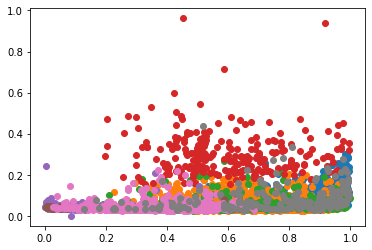

In [47]:
# assign a cluster to each example
labels = kmeans.predict(X_scaled_df)
# retrieve unique clusters
clusters = np.unique(labels)
# create scatter plot for samples from each cluster
for cluster in clusters:
    # get row indexes for samples with this cluster
    row_ix = np.where(labels == cluster)
    # create scatter of these samples
    pyplot.scatter(X.to_numpy()[row_ix, 1], X.to_numpy()[row_ix, 3])
# show the plot
pyplot.show()

In [48]:
labels

array([1, 1, 1, ..., 2, 2, 2], dtype=int32)

In [49]:
clusters = kmeans.predict(X_scaled_df)

pd.Series(clusters).value_counts().sort_index()

0    843
1    936
2    328
3    240
4    291
5     73
6    440
7    208
dtype: int64

In [50]:
X["cluster"] = clusters
X

,danceability,energy,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo,id,duration_ms,cluster
0,0.733,0.812,-4.634,0.0421,0.02240,0.000962,0.1670,0.409,122.985,39C3SOi6UMD9rHeXAQPNa9,154471,1
1,0.733,0.855,-4.951,0.0528,0.38800,0.000001,0.1410,0.163,111.958,5cBz1eRdiLpTVcKBZkHnul,166092,1
2,0.698,0.781,-5.615,0.0401,0.14300,0.000000,0.0762,0.851,124.017,2tX3PY8eP3h9XaBcLXuRBa,166573,1
3,0.863,0.874,-4.798,0.0884,0.00712,0.087800,0.0455,0.811,125.020,6OHQzBYaXeF6FVu8gxLMkE,144025,1
4,0.727,0.695,-6.190,0.0518,0.00839,0.000000,0.1100,0.811,127.995,164QjgWOxnSZYHQghRKeC0,193382,1
...,...,...,...,...,...,...,...,...,...,...,...,...
3354,0.646,0.464,-9.954,0.4090,0.06950,0.887000,0.1400,0.703,197.399,1uy8jY4k6SmI2Zr6fwbldQ,241306,3
3355,0.946,0.714,-4.598,0.0999,0.00658,0.076100,0.0590,0.823,113.049,7gWTNLC7MX5L9Ii2Ojggto,324078,1
3356,0.298,0.968,-4.893,0.0539,0.04810,0.869000,0.2790,0.776,173.540,6d2O45piXdSJ1ieRFuYYXn,222533,2
3357,0.542,0.915,-3.294,0.1910,0.02150,0.828000,0.2000,0.642,136.020,4wIMg49wp66ned9IZ6QUzf,208385,2


In [51]:
X.to_csv('data/playlists_clustered.csv', index = False)